# Pick an event and inspect it

Useful for debugging

## Globals

In [1]:
file_name = "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00060008.root" # "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00075127.root"
event = 38729 # 217055
subrun = 63475 # 63475

## Imports

In [2]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
from pyutils.pyprocess import Processor
from pyutils.pyplot import Plot
from pyutils.pyprint import Print
from pyutils.pyselect import Select
from pyutils.pyvector import Vector
import sys 
sys.path.append("../../common")
from analyse import Analyse 

# Import data

In [3]:
processor = Processor( 
    use_remote = True,
    location = "disk",
    verbosity = 1
)

branches = [ 
    "crvcoincs.pos.fCoordinates.fZ",
    "crvcoincs.pos.fCoordinates.fY",
    "crvcoincs.pos.fCoordinates.fX"
]

# Single file
data = processor.process_data(
    # defname = "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.root",
    file_list_path = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_24.txt",
    # file_name = "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00060008.root",
    # branches = "*"
    branches = branches
)

# help(processor.process_data)

# # Create your custom processor class
# # We inherit from Skeleton - this gives us many pre-built methods without writing extra code
# class CosmicProcessor(Skeleton):
#     """Your custom file processor 
    
#     This class inherits from the Skeleton base class, which provides the 
#     basic structure and methods withing the Processor framework 
#     """
#     def __init__(self):
#         """Initialise your processor with specific configuration
        
#         This method sets up all the parameters needed for this specific analysis.
#         """
#         # Call the parent class's __init__ method first
#         # This ensures we have all the base functionality properly set up
#         super().__init__()

#         # Now override parameters from the Skeleton with the ones we need
#         # Data selection configuration 
#         # self.defname = "nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.root"
#         self.file_list_path = "//exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_24.txt"
#         # self.file_list_path = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_99.txt"
#         # self.file_list_path = "/exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0.txt"
#         # self.file_list_path = "/exp/mu2e/data/users/sgrant/pyutils-test/TestFileLists/local_file_list.txt"
#         # self.file_list_path = "/exp/mu2e/data/users/sgrant/pyutils-test/TestFileLists/local_0.txt"
    
#         self.branches = { 
#             "evt" : [
#                 "run",
#                 "subrun",
#                 "event",
#             ],
#             "crv" : [
#                 "crvcoincs.time",
#                 "crvcoincs.nHits",
#                 "crvcoincs.pos.fCoordinates.fZ"
#             ],
#             "trk" : [
#                 "trk.nactive", 
#                 "trk.pdg", 
#                 "trkqual.valid",
#                 "trkqual.result"
#             ],
#             "trkfit" : [
#                 "trksegs",
#                 "trksegpars_lh"
#             ],
#             "trkmc" : [
#                 "trkmcsim"
#             ]
#         }
#         self.use_remote = True     # Use remote file via mdh
#         self.location = "disk"     # File location
#         self.max_workers = 4      # Limit the number of workers
#         self.verbosity = 2         # Set verbosity 
#         self.use_processes = True  # Use processes rather than threads
        
#         # Now add your own analysis-specific parameters 

#         # Init analysis methods
#         # Would be good to load an analysis config here 
#         self.analyse = Analyse(verbosity=0)
            
#         # Custom prefix for log messages from this processor
#         self.print_prefix = "[CosmicProcessor] "
#         print(f"{self.print_prefix}Initialised")
    
#     # ==========================================
#     # Define the core processing logic
#     # ==========================================
#     # This method overrides the parent class's process_file method
#     # It will be called automatically for each file by the execute method
#     def process_file(self, file_name): 
#         """Process a single ROOT file
        
#         This method will be called for each file in our list.
#         It extracts data, processes it, and returns a result.
        
#         Args:
#             file_name: Path to the ROOT file to process
            
#         Returns:
#             A tuple containing the histogram (counts and bin edges)
#         """
#         try:
#             # Create a local pyprocess Processor to extract data from this file
#             # This uses the configuration parameters from our class
#             this_processor = Processor(
#                 use_remote=self.use_remote,     # Use remote file via mdh
#                 location=self.location,         # File location
#                 verbosity=0 # self.verbosity        # Reduce output in worker threads
#             )
            
#             # Extract the data 
#             this_data = this_processor.process_data(
#                 file_name = file_name, 
#                 branches = self.branches
#             )
            
#             # ---- Analysis ----            
#             results = self.analyse.execute(this_data, file_name)

#             # Clean up
#             gc.collect()

#             return results 
        
#         except Exception as e:
#             # Handle any errors that occur during processing
#             print(f"{self.print_prefix}Error processing {file_name}: {e}")
#             return None

#     ## Need postprocessing and failure handling!    

[pyutils] ⭐️ Setting up...
[pyutils] ✅ Ready
[pyprocess] ⭐️ Initialised Processor:
	path = 'EventNtuple/ntuple'
	use_remote = True
	location = disk
	schema = root
	verbosity=1
[pyprocess] ⭐️ Loading file list from /exp/mu2e/data/users/sgrant/mu2e_cosmic_ana/nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.0_24.txt
[pyprocess] ✅ Successfully loaded file list
	Path: None
	Count: 25 files
[pyprocess] ⭐️ Starting processing on 25 files with 25 threads


Processing: 100%|██████████████████████████████| 25/25 [00:13<00:00,  1.79file/s, successful=25, failed=0]

[pyprocess] ✅ Returning concatenated array containing 175780 events


In [12]:
Z = ak.flatten(data["crvcoincs.pos.fCoordinates.fZ"],axis=None)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	h1_Z_plot.png


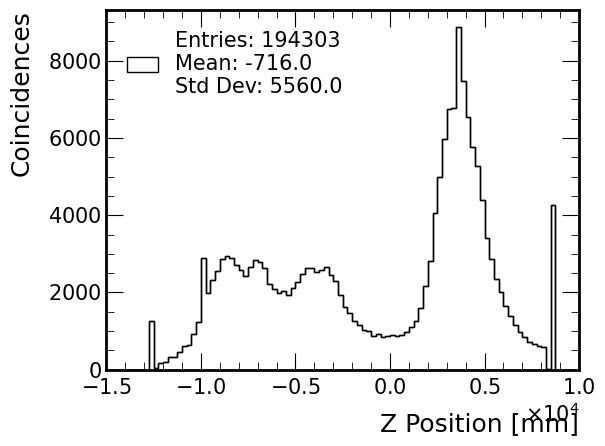

In [13]:
# Initialise the plotter
plotter = Plot()

# Create a 1D histogram of track times
plotter.plot_1D(
    Z,               # Data to plot
    nbins=100,               # Number of bins
    xmin=-15000,                # Minimum x-axis value
    xmax=10000,               # Maximum x-axis value
    xlabel="Z Position [mm]",
    ylabel="Coincidences",
    out_path='h1_Z_plot.png',  # Output file path
    stat_box=True, # Show statistics box
)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	h1_Y_plot.png


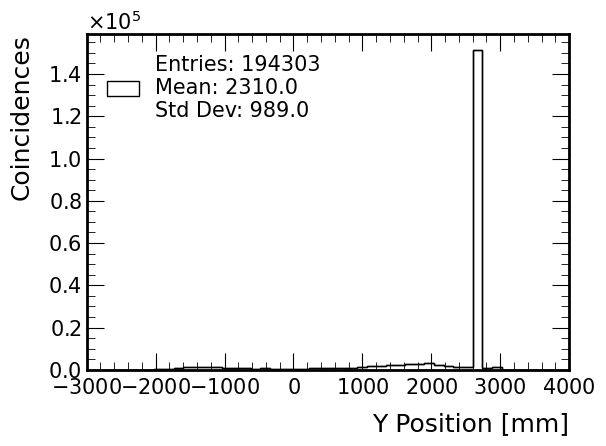

In [14]:
Z = ak.flatten(data["crvcoincs.pos.fCoordinates.fY"],axis=None)
# Initialise the plotter
plotter = Plot()

# Create a 1D histogram of track times
plotter.plot_1D(
    Z,              # Data to plot
    nbins=50,               # Number of bins
    xmin=-3000,                # Minimum x-axis value
    xmax=4000,               # Maximum x-axis value
    xlabel="Y Position [mm]",
    ylabel="Coincidences",
    out_path='h1_Y_plot.png',  # Output file path
    stat_box=True, # Show statistics box
)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyplot] ✅ Wrote:
	h1_X_plot.png


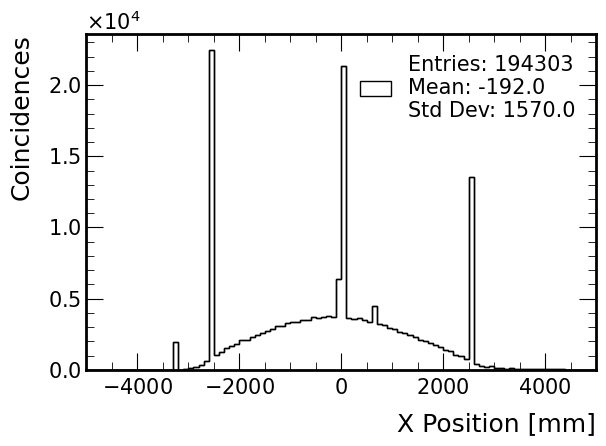

In [15]:
Z = ak.flatten(data["crvcoincs.pos.fCoordinates.fX"],axis=None)
# Initialise the plotter
plotter = Plot()

# Create a 1D histogram of track times
plotter.plot_1D(
    Z,               # Data to plot
    nbins=100,               # Number of bins
    xmin=-5000,                # Minimum x-axis value
    xmax=5000,               # Maximum x-axis value
    xlabel="X Position [mm]",
    ylabel="Coincidences",
    out_path='h1_X_plot.png',  # Output file path
    stat_box=True, # Show statistics box
)

[pyplot] ✅ Wrote:
	h2_X_Y.png


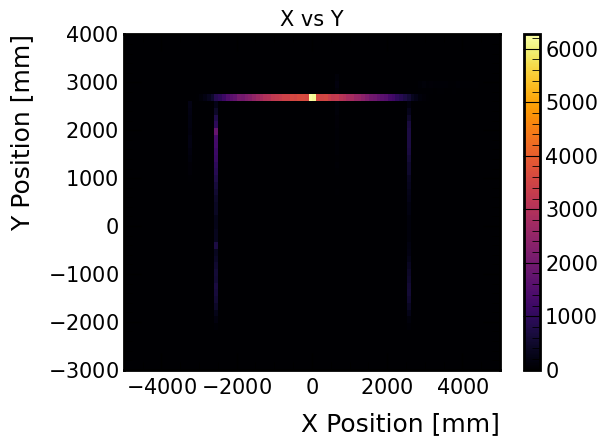

In [16]:
# Extract and flatten X and Y coordinates
x_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fX"])
y_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fY"])

# Plot
plotter.plot_2D(
    x=x_flat,
    y=y_flat,
    nbins_x=100,
    xmin=-5000,
    xmax=5000,
    nbins_y=50,
    ymin=-3000,
    ymax=4000,
    title="X vs Y",
    xlabel="X Position [mm]",
    ylabel="Y Position [mm]",
    out_path='h2_X_Y.png'
)

[pyplot] ✅ Wrote:
	h2_Z_Y.png


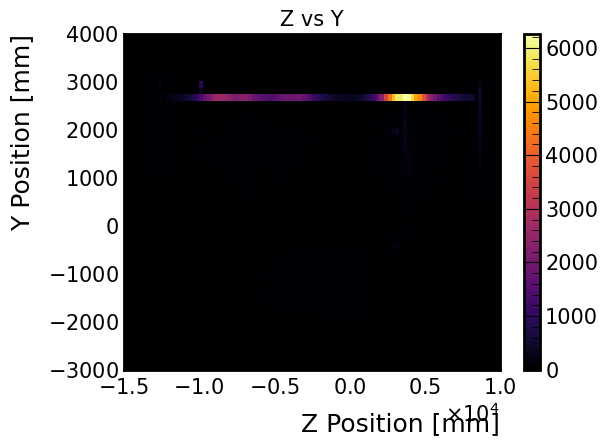

In [17]:
# Extract and flatten X and Y coordinates
z_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fZ"])
y_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fY"])

# Plot
plotter.plot_2D(
    x=z_flat,
    y=y_flat,
    nbins_x=100,
    xmin=-15000,
    xmax=10000,
    nbins_y=50,
    ymin=-3000,
    ymax=4000,
    title="Z vs Y",
    xlabel="Z Position [mm]",
    ylabel="Y Position [mm]",
    out_path='h2_Z_Y.png'
)

[pyplot] ✅ Wrote:
	h2_X_Z.png


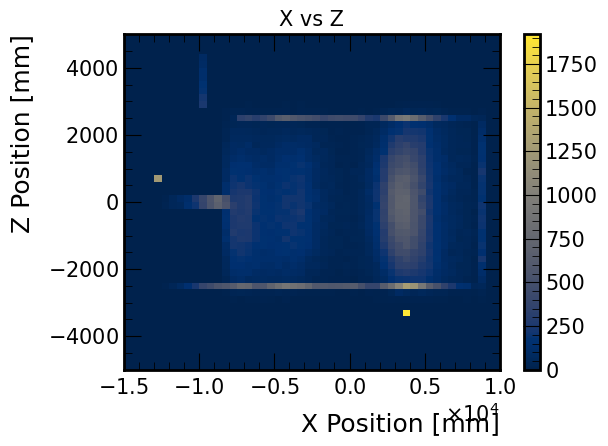

In [25]:
# Extract and flatten X and Y coordinates
z_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fZ"])
x_flat = ak.flatten(data["crvcoincs.pos.fCoordinates.fX"])

# Plot
plotter.plot_2D(
    x=z_flat,
    y=x_flat,
    nbins_x=50, #100,
    xmin=-15000,
    xmax=10000,
    nbins_y=50, #100,
    ymin=-5000,
    ymax=5000,
    title="X vs Z",
    xlabel="X Position [mm]",
    ylabel="Z Position [mm]",
    out_path='h2_X_Z.png',
    cmap="cividis"
    # log_z=True
)



In [19]:
help(plotter.plot_2D)

Help on method plot_2D in module pyutils.pyplot:

plot_2D(x, y, weights=None, nbins_x=100, xmin=-1.0, xmax=1.0, nbins_y=100, ymin=-1.0, ymax=1.0, title=None, xlabel=None, ylabel=None, zlabel=None, out_path=None, cmap='inferno', dpi=300, log_x=False, log_y=False, log_z=False, colorbar=True, ax=None, show=True) method of pyutils.pyplot.Plot instance
    Plot a 2D histogram from two arrays of the same length.

    Args:
        x (np.ndarray): Array of x-values
        y (np.ndarray): Array of y-values
        weights (np.ndarray, optional): Optional weights for each point
        nbins_x (int): Number of bins in x. Defaults to 100
        xmin (float): Minimum x value. Defaults to -1.0
        xmax (float): Maximum x value. Defaults to 1.0
        nbins_y (int): Number of bins in y. Defaults to 100
        ymin (float): Minimum y value. Defaults to -1.0
        ymax (float): Maximum y value. Defaults to 1.0
        title (str, optional): Plot title
        xlabel (str, optional): X-axis 